# MAGMA experimnetations

## Artificial data : Common HP + Uncommon grid

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

plt.style.use("bmh")
sys.path.append("../src/")
warnings.filterwarnings("ignore")

from kernels import ExponentiatedQuadraticKernel, GaussianKernel
from MAGMA import MAGMA

In [4]:
N = 200
M = 5

t0 = 0
tN = 10 + 1e-3

common_T = np.linspace(t0, tN, N)
print(common_T.shape)

(200,)


In [5]:
a = np.random.uniform(-2, 2)
b = np.random.uniform(0, 10)

m0 = a * common_T + b
m0_function = lambda t : a * t + b
print(m0.shape)

(200,)


In [6]:
theta0 = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
print(theta0)

[116.90474434   1.22155991]


In [7]:
K_theta0 = ExponentiatedQuadraticKernel.compute_all(theta0, common_T)
print(K_theta0.shape)

(200, 200)


In [8]:
mu0 = np.random.multivariate_normal(m0, K_theta0)
print(mu0.shape)

(200,)


In [9]:
Theta = np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))])
Sigma = np.random.uniform(0, 1)

print(Theta)
print(Sigma)

[17.6281688   6.77568893]
0.6678382658924337


In [11]:
Ni = 30

T = np.zeros((M, Ni))
Y = np.zeros((M, Ni))

for i in range(M):
    Ti = np.sort(np.random.choice(common_T, size=Ni, replace=False))
    mask = np.isin(common_T, Ti)

    C_Theta = ExponentiatedQuadraticKernel.compute_all(Theta, Ti)
    Psi_Theta_Sigma = C_Theta + Sigma * np.identity(Ni)

    mu0_i = mu0[mask]
    Yi = np.random.multivariate_normal(mu0_i, Psi_Theta_Sigma)

    T[i] = Ti
    Y[i] = Yi


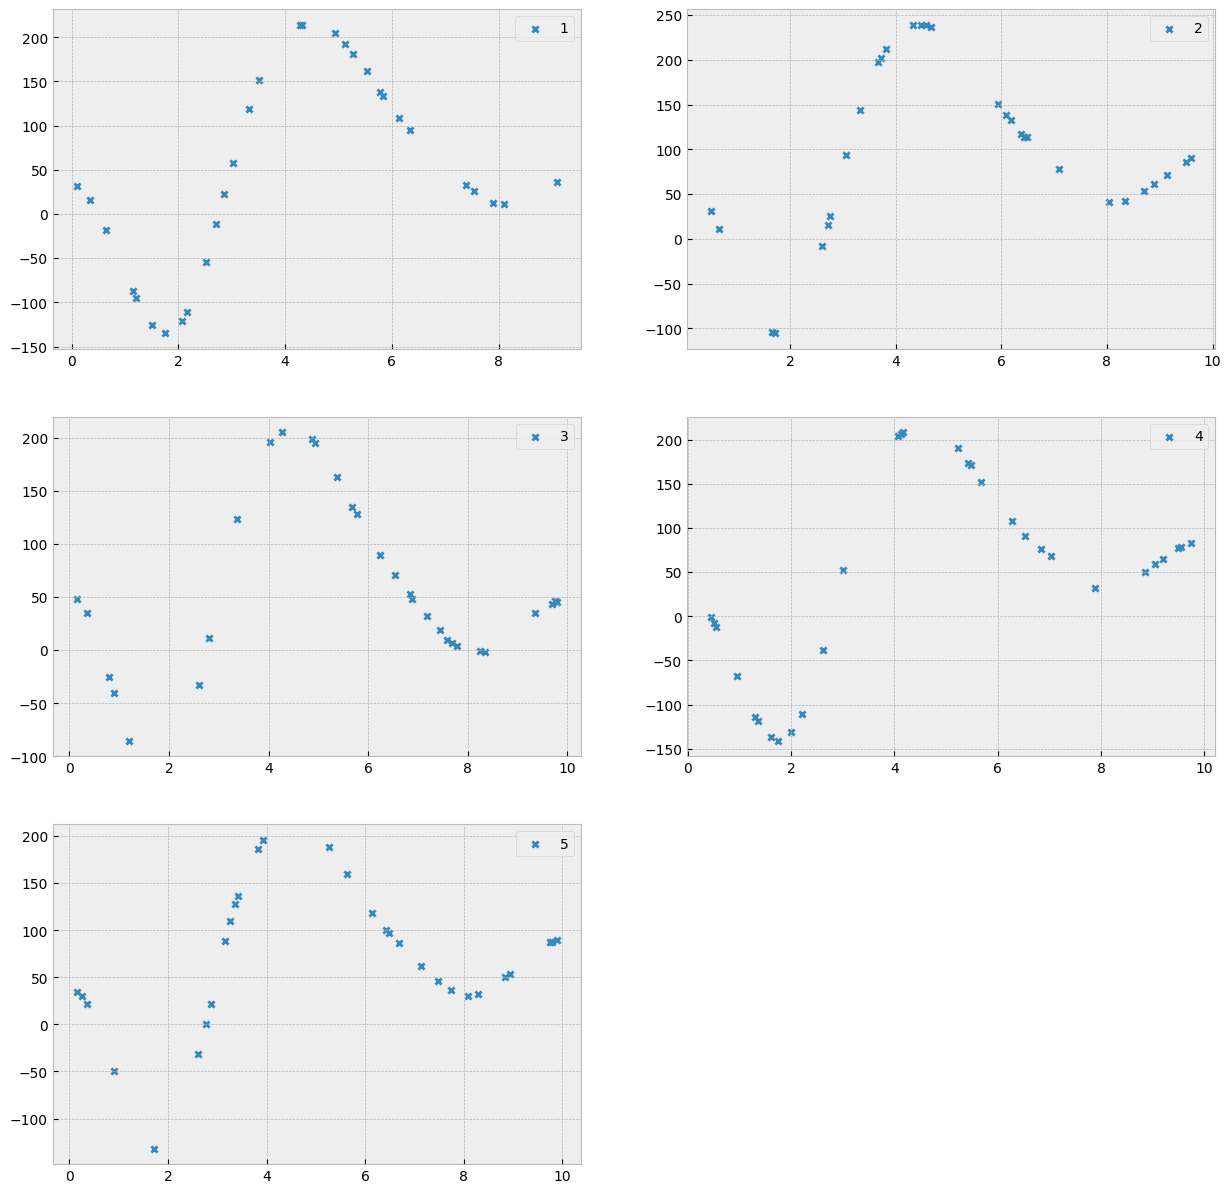

In [15]:
plt.figure(figsize=(15, int(np.ceil(M/2)) * 5))
for i in range(1, M + 1):
    plt.subplot(int(np.ceil(M/2)), 2, i)
    plt.scatter(T[i-1], Y[i - 1], label=f"{i}", s=20, marker='x')
    plt.legend()
plt.show()

In [18]:
model = MAGMA(
    T=T,
    Y=Y,
    common_T=common_T,
    m0=m0, 
    m0_function=m0_function,
    theta0=np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))]), 
    Theta=np.array([np.random.uniform(1, np.exp(5)), np.random.uniform(1, np.exp(2))]), 
    Sigma=np.random.uniform(0, 1),
    common_hp_flag=True,
    common_grid_flag=False,
    save_history_flag=True,
    scipy_optimize_display=True,
    kernel_k=ExponentiatedQuadraticKernel,
    kernel_c=ExponentiatedQuadraticKernel,
)

In [19]:
model.Y_normalized.shape

(5, 200)

In [20]:
model.T[0]

array([0.10051256, 0.35179397, 0.65333166, 1.15589447, 1.20615075,
       1.50768844, 1.75896985, 2.06050754, 2.1610201 , 2.51281407,
       2.7138392 , 2.86460804, 3.01537688, 3.31691457, 3.5179397 ,
       4.27178392, 4.3220402 , 4.92511558, 5.1261407 , 5.27690955,
       5.52819095, 5.77947236, 5.82972864, 6.13126633, 6.33229146,
       7.38767337, 7.53844221, 7.89023618, 8.09126131, 9.09638693])

In [22]:
model.common_T

array([ 0.        ,  0.05025628,  0.10051256,  0.15076884,  0.20102513,
        0.25128141,  0.30153769,  0.35179397,  0.40205025,  0.45230653,
        0.50256281,  0.5528191 ,  0.60307538,  0.65333166,  0.70358794,
        0.75384422,  0.8041005 ,  0.85435678,  0.90461307,  0.95486935,
        1.00512563,  1.05538191,  1.10563819,  1.15589447,  1.20615075,
        1.25640704,  1.30666332,  1.3569196 ,  1.40717588,  1.45743216,
        1.50768844,  1.55794472,  1.60820101,  1.65845729,  1.70871357,
        1.75896985,  1.80922613,  1.85948241,  1.90973869,  1.95999497,
        2.01025126,  2.06050754,  2.11076382,  2.1610201 ,  2.21127638,
        2.26153266,  2.31178894,  2.36204523,  2.41230151,  2.46255779,
        2.51281407,  2.56307035,  2.61332663,  2.66358291,  2.7138392 ,
        2.76409548,  2.81435176,  2.86460804,  2.91486432,  2.9651206 ,
        3.01537688,  3.06563317,  3.11588945,  3.16614573,  3.21640201,
        3.26665829,  3.31691457,  3.36717085,  3.41742714,  3.46

In [21]:
model.T_masks[0]

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [23]:
model.Y[0]

array([  31.93037172,   15.82699768,  -17.67437038,  -87.58166181,
        -95.48147865, -126.02312453, -135.18069001, -120.61321757,
       -110.7377657 ,  -54.69913019,  -11.16636259,   22.62889389,
         57.52175955,  118.35532252,  151.24425876,  214.25514478,
        214.22608313,  204.49410884,  192.30626448,  181.15437116,
        161.32258513,  137.52846957,  133.18599923,  108.78254173,
         94.70938751,   33.23096332,   26.49476782,   12.75683379,
         10.85724736,   35.61498643])

In [27]:
model.Y_normalized[0]

array([   0.        ,    0.        ,   31.93037172,    0.        ,
          0.        ,    0.        ,    0.        ,   15.82699768,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,  -17.67437038,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,  -87.58166181,
        -95.48147865,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        , -126.02312453,    0.        ,
          0.        ,    0.        ,    0.        , -135.18069001,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , -120.61321757,    0.        , -110.7377657 ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,  -54.69913019,    0.        ,
          0.        ,    0.        ,  -11.16636259,    0.        ,
          0.        ,   22.62889389,    0.        ,    0.     

In [28]:
model.fit(max_iterations=1, eps=-np.inf)

MAGMA Training:   0%|          | 0/1 [00:00<?, ?it/s]

theta0


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.14198D+03    |proj g|=  2.35220D-03
At iterate    1    f= -2.14198D+03    |proj g|=  2.35220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      3      1     0     0   2.352D-03  -2.142D+03
  F =  -2141.9763182083698     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

Theta & Sigma


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=    -Infinity    |proj g|=  3.26078D+01

At iterate    1    f=    -Infinity    |proj g|=  1.26723D+03

At iterate    2    f=    -Infinity    |proj g|=  2.29014D+02

At iterate    3    f=    -Infinity    |proj g|=  2.03841D+02

At iterate    4    f=    -Infinity    |proj g|=  1.29544D+02

At iterate    5    f=    -Infinity    |proj g|=  1.01218D+02

At iterate    6    f=    -Infinity    |proj g|=  8.28508D+01

At iterate    7    f=    -Infinity    |proj g|=  7.31710D+01

At iterate    8    f=    -Infinity    |proj g|=  1.67547D-12

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

MAGMA Training: 100%|██████████| 1/1 [01:38<00:00, 98.22s/it]


In [30]:
model.scipy_optimize_display = False
model.fit(max_iterations=49, eps=-np.inf)

MAGMA Training: 100%|██████████| 49/49 [14:03<00:00, 17.22s/it]


In [31]:
history = model.history
len(history)

51

In [32]:
LL_theta0 = []
LL_Theta_Sigma = []

for epoch_history in history[1:]:
    LL_theta0.append(epoch_history["LL_theta0"])
    LL_Theta_Sigma.append(epoch_history["LL_Theta_Sigma"])

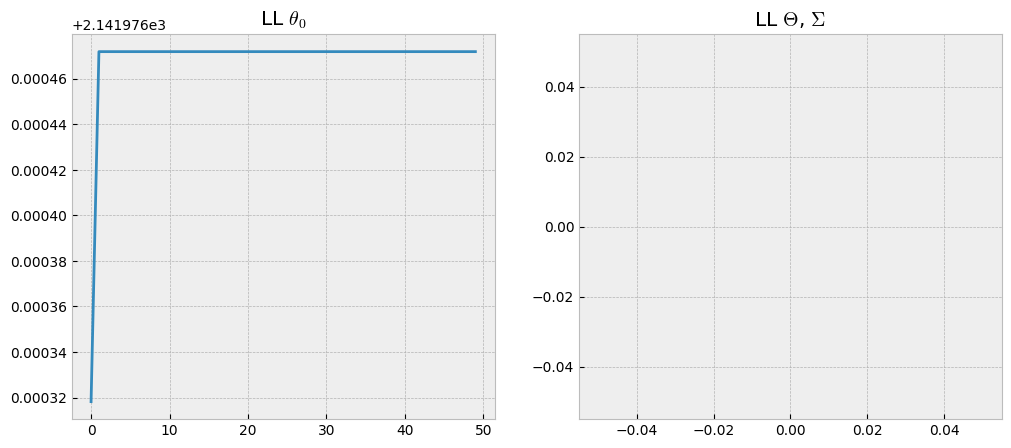

In [33]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(LL_theta0)
plt.title("LL $\\theta_0$")
plt.subplot(1, 2, 2)
plt.plot(LL_Theta_Sigma)
plt.title("LL $\Theta$, $\Sigma$")
plt.show()

In [34]:
Sigma = []
for epoch_history in history:
    Sigma.append(epoch_history["Sigma"])

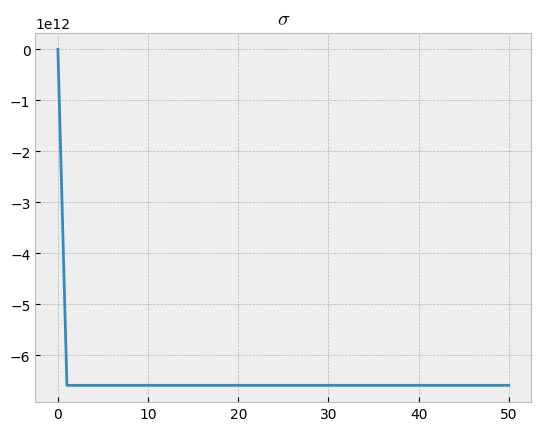

In [35]:
plt.plot(Sigma)
plt.title("$\sigma$")
plt.show()

In [36]:
m0_estim_norms = []
for epoch_history in history[1:]:
    m0_estim_norms.append(np.linalg.norm(epoch_history["m0"]))

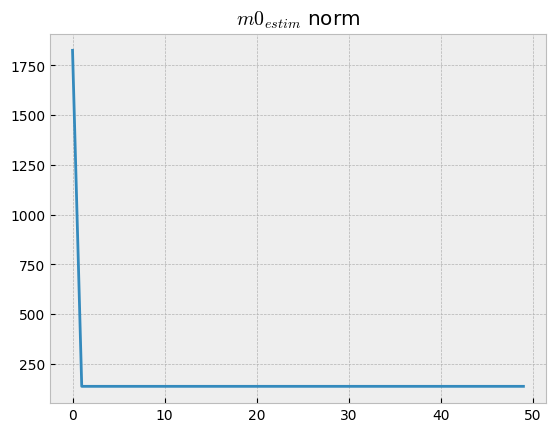

In [37]:
plt.plot(m0_estim_norms)
plt.title("$m0_{estim}$ norm")
plt.show()

In [38]:
theta0 = []
for epoch_history in history:
    theta0.append(epoch_history["theta0"])
theta0 = np.array(theta0)
print(model.theta0)

[64.2332537   1.96030608]


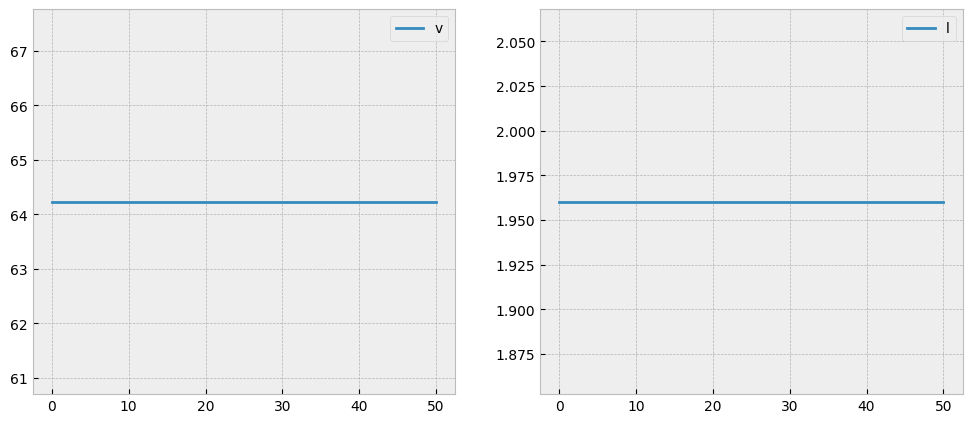

In [39]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(theta0[:, 0], label="v")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(theta0[:, 1], label="l")
plt.legend()
plt.show()

In [40]:
Theta = []
for epoch_history in history:
    Theta.append(epoch_history["Theta"])
Theta = np.array(Theta)
print(model.Theta)

[-2.98423876e+12 -2.94687953e+14]


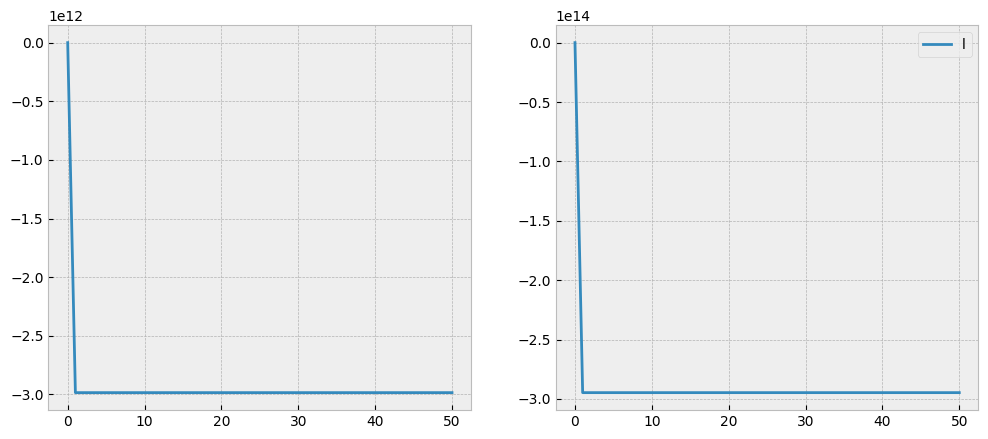

In [41]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Theta[:, 0], label="v")
plt.subplot(1, 2, 2)
plt.plot(Theta[:, 1], label="l")
plt.legend()
plt.show()